In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



#Read into the data
df = pd.read_csv(r"C:\Users\Hank\Documents\PortfolioProjects\Datasets\movies.csv")
df.shape

(7668, 15)

In [2]:
#Lets look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))


# Drop missing rows 
# Here we simlply drop the rows that contains "null" values. 
df_droped = df.dropna()
print("")
print("Original Df",df_droped.shape)
print("Cleaned DF",df.shape)

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%

Original Df (5421, 15)
Cleaned DF (7668, 15)


In [4]:
# Data types for columns
df_droped.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

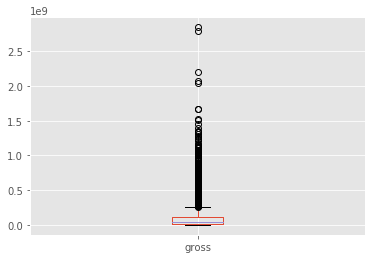

In [5]:
# Are there any Outliers?

df_droped.boxplot(column=['gross'])

In [6]:
# Correcting some data types for each columns 
df_droped['budget'] = df_droped['budget'].astype('int64')
df_droped['gross'] = df_droped['gross'].astype('int64')

In [7]:
df_droped.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
# We can see the values in years does not always match released column information.
# Let's create a new colum that uses "relseaed" information.
# Create correct year columns
tmp = df_droped['released'].str.split('(')


yearcorrect = list()

for row in tmp:
    yearcorrect.append(row[0][-5:-1])
    
print(yearcorrect[:5])
df_droped["yearcorrect"] = yearcorrect
df_droped.head()

['1980', '1980', '1980', '1980', '1980']


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [9]:
#Drop ant Duplicates
df_droped.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [10]:
# Order our Data a little bit to see
df_droped.sort_values(by = ["gross"], inplace = False , ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


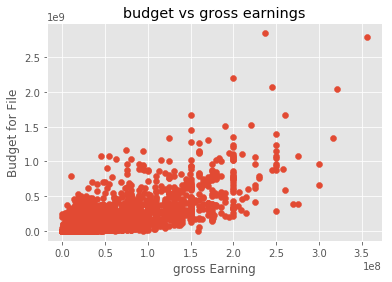

In [11]:
# Scatterplot with budget vs gross


plt.scatter(x = df_droped['budget'] , y = df_droped['gross'])
plt.title('budget vs gross earnings')

plt.xlabel('gross Earning')
plt.ylabel('Budget for File')
plt.show()

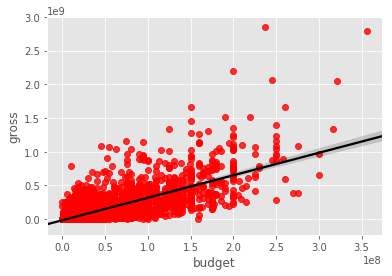

In [12]:
sns.regplot(x = 'budget' , y = 'gross' , data = df_droped, scatter_kws = {"color": "red"} , line_kws = {"color": "black"})

In [13]:
# Lets start Looking ar correlation
# Differnt type of correlation method = pearson , kendall, spearman 
df_droped.corr(method = 'pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [14]:
df_droped.corr(method = 'kendall') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [15]:
df_droped.corr(method = 'spearman') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


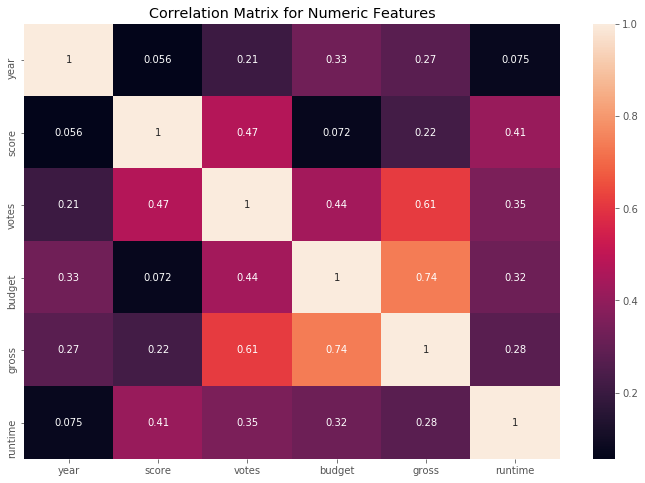

In [16]:
# Correlation Matrix between all numeric columns

correlation_matrix = df_droped.corr(method = "pearson")
fig, ax = plt.subplots(figsize=(12,8))  
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix , annot = True , ax = ax)
plt.show()

In [17]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df_droped.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980,0.921688
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265,0.169681
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056,0.031669
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864,0.950610
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650,0.945065
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831,-0.012946
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362,0.316065
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918,0.708189
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123,0.779672
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297,0.684736


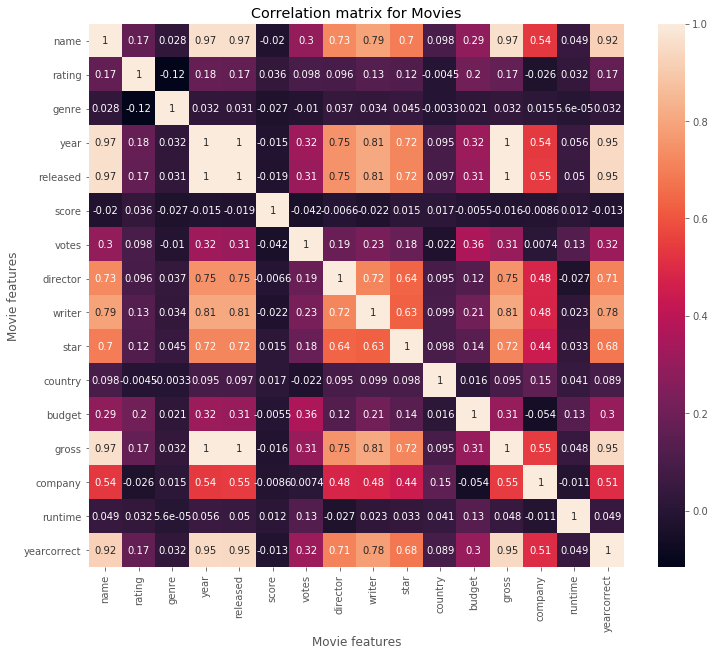

In [18]:
correlation_matrix = df_droped.apply(lambda x: x.factorize()[0]).corr(method='pearson')

fig, ax = plt.subplots(figsize=(12,10))  

sns.heatmap(correlation_matrix, annot = True , ax =ax)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [19]:

correlation_mat = df_droped.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)


name         name           1.000000
             rating         0.169808
             genre          0.028413
             year           0.965461
             released       0.966086
             score         -0.020083
             votes          0.297305
             director       0.725411
             writer         0.791872
             star           0.695124
             country        0.098110
             budget         0.288955
             gross          0.967925
             company        0.535369
             runtime        0.048980
             yearcorrect    0.921688
rating       name           0.169808
             rating         1.000000
             genre         -0.116507
             year           0.179456
             released       0.171063
             score          0.036114
             votes          0.097619
             director       0.096014
             writer         0.128909
             star           0.115694
             country       -0.004547
 

In [20]:

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        rating        -0.116507
rating       genre         -0.116507
budget       company       -0.053573
company      budget        -0.053573
score        votes         -0.041981
votes        score         -0.041981
genre        score         -0.027402
score        genre         -0.027402
director     runtime       -0.026918
runtime      director      -0.026918
rating       company       -0.026286
company      rating        -0.026286
country      votes         -0.021562
votes        country       -0.021562
score        writer        -0.021538
writer       score         -0.021538
name         score         -0.020083
score        name          -0.020083
released     score         -0.019486
score        released      -0.019486
             gross         -0.015744
gross        score         -0.015744
score        year          -0.014594
year         score         -0.014594
score        yearcorrect   -0.012946
yearcorrect  score         -0.012946
company      runtime       -0.010695
r

In [21]:
# We can now take a look at the ones that have a high correlation (> 0.7 )

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7 ]
strong_pairs = strong_pairs[abs(sorted_pairs) < 1 ]
print(strong_pairs)

director     yearcorrect    0.708189
yearcorrect  director       0.708189
writer       director       0.717990
director     writer         0.717990
year         star           0.719373
star         year           0.719373
released     star           0.720076
star         released       0.720076
gross        star           0.720811
star         gross          0.720811
director     name           0.725411
name         director       0.725411
year         director       0.747785
director     year           0.747785
             released       0.750825
released     director       0.750825
gross        director       0.751737
director     gross          0.751737
yearcorrect  writer         0.779672
writer       yearcorrect    0.779672
name         writer         0.791872
writer       name           0.791872
             released       0.809858
released     writer         0.809858
writer       gross          0.811356
gross        writer         0.811356
writer       year           0.812386
y

In [22]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df_droped.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [23]:
df_droped.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [24]:
df_droped.groupby(['company', 'yearcorrect'])[["gross"]].sum()

gross
company                             yearcorrect           
"DIA" Productions GmbH & Co. KG     2003          44350926
"Weathering With You" Film Partners 2020         193457467
.406 Production                     1997             10580
1492 Pictures                       1996         129832389
                                    1999          87423861
1818 Productions                    1983          12232628
19 Entertainment                    2003           4928883
1978 Films                          2017          40656399
1984 Private Defense Contractors    2014          58834384
2 Loop Films                        2003            264349
2.0 Entertainment                   2019         122810399
2.4.7. Films                        2008          22783978
2003 Productions                    2005          69424389
20th Century Studios                2020         111105497
21 Laps Entertainment               2014          41296320
                                    2018          41142379
21st Century Film Corporation       1990           5835247
21st Century Films                  1994           1702394
25th Hour Productions               2003          23932055
26 Films                            2009          20458873
2929 Productions                    2008          14007547
                                    2009          21946121
                                    2015           5092129
2DUX²                               2017            678150
                                    2018         197744377
3 Arts Entertainment                1996          60209334
                                    1997          75812433
                                    2001          71186502
                                    2011            649626
                                    2013           3909596
...                                                    ...
Worldview Entertainment             2017           9204549
X-Filme Creative Pool               2010          19319671
                                    2016           9169507
Yari Film Group (YFG)               2009            409832
Yari Film Group Releasing           2006           2636637
Yash Raj Films                      2004           6887221
Yellow Bird                         2010         104414200
Young Hannibal Productions          2007          82169884
Young Sung Production Co.           1985           3360800
Zacharias-Buhai Productions         1988          17550399
Zanuck/Brown Productions            1988          25024919
Zazen Produções                     2007          14759148
Zenith Entertainment                1987            406881
Zentropa Entertainments             2000          40059672
                                    2004          16689283
                                    2005            674918
                                    2009           7413863
                                    2011          17039814
Zeta Entertainment                  1993            114516
Zoetrope Studios                    1982            636796
                                    1983          28192127
                                    1984          25928721
                                    1985            569996
Zucker Brothers Productions         1998           7027290
double A Films                      2000           2046433
erbp                                2013            587174
i am OTHER                          2015          17986781
i5 Films                            2001          10031529
micro_scope                         2011           7099598
thefyzz                             2017          62198461

[2998 rows x 1 columns]

In [25]:
CompanyGrossSum = df_droped.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

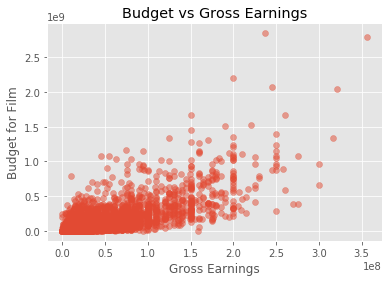

In [28]:
plt.scatter(x=df_droped['budget'], y=df_droped['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()